Jupyter Python3 notebook for reproducing figures in PNAS manuscript, "Dynamics of growth, death, and competition in sessile organisms." In order to reproduce the figures, the corresponding pickles must be generated by running the code in `pipeline.py`.

Author: Eddie Lee, edlee@santafe.edu

In [36]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [37]:
plt.rc('font', size=20)

In [40]:
from pyutils import *
from statsmodels.distributions import ECDF
import os
from misc.plot import colorcycle
import pandas as pd
from matplotlib.patches import Circle
from matplotlib.collections import PatchCollection
from matplotlib.gridspec import GridSpec
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.image import imread
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [43]:
# this should be set to the path to which images are saved
imgdr = os.path.expanduser('~') + '/Dropbox/Research/forests/writing/20201130_pnas'

In [481]:
load_pickle('cache/packing_example.p')

['areaDeathRateRange',
 'r0',
 'basal',
 'rRange',
 'g0',
 'L',
 'burnIn',
 'sampleSize',
 'dt',
 'coeffs',
 'xy',
 'nk']

In [482]:
kl = np.zeros_like(areaDeathRateRange)
interpkl = zeros_like(areaDeathRateRange)
optbinWidth = zeros_like(areaDeathRateRange)

for j, adr in list(enumerate(areaDeathRateRange)):
    dr = concatenate([nn.dist(xy_) for xy_ in xy[adr]])
    N = mean([len(xy_) for xy_ in xy[adr]])
    
    # interpolate DKL curve to extrapolate value
    bins = logspace(log10(dr.max()/dr.size)+2, log10(dr.max()/dr.size)+5, 30)
    d = zeros_like(bins)
    for k in range(d.size):
        d[k] = nn.kl(dr, N, L, bins[k])
    optbinWidth[j] = bins[argmin(d)]
    
    kl[j] = nn.kl(dr, N, L, optbinWidth[j])

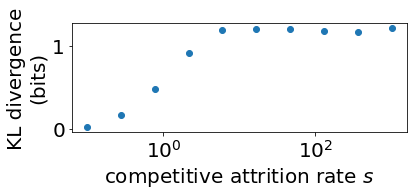

In [483]:
fig, ax = plt.subplots(figsize=(6,2))
ax.semilogx(areaDeathRateRange, kl, 'o')

ax.set(xlabel=r'competitive attrition rate $s$',
       ylabel='KL divergence\n(bits)')
fig.savefig(f'{imgdr}/dkl_ordering.pdf', bbox_inches='tight')

In [484]:
from matplotlib.gridspec import GridSpecFromSubplotSpec

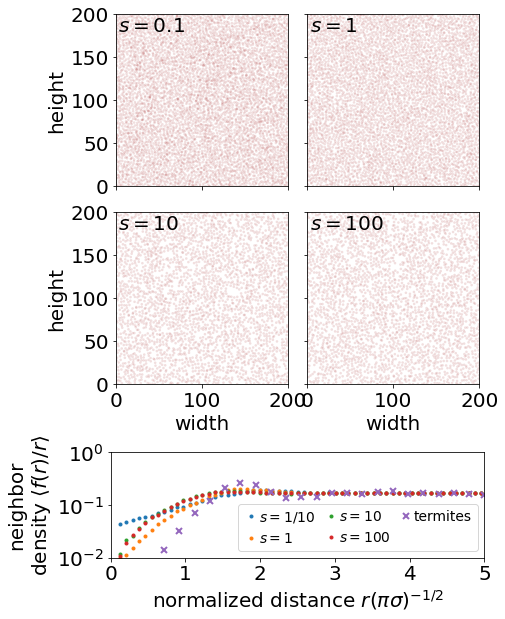

In [487]:
load_pickle('cache/spacing_with_cg.p')

allxy = xy

fig = plt.figure(figsize=(6.7,10))
gs = GridSpec(3, 2, wspace=.1, hspace=.5, height_ratios=(1,1,.7))
gsSub = GridSpecFromSubplotSpec(2,2, gs[:2,:], wspace=.05, hspace=.15)
ax = (fig.add_subplot(gsSub[0,0], aspect='equal'),
      fig.add_subplot(gsSub[0,1], aspect='equal'),
      fig.add_subplot(gsSub[1,0], aspect='equal'),
      fig.add_subplot(gsSub[1,1], aspect='equal'))

xy = vstack(allxy[cgRange[-1]][areaDeathRateRange[0]][0])
data.plot(xy, [1.5]*len(xy), 200, ax=ax[0])
ax[0].text(3, 180, r'$s=0.1$')

xy = vstack(allxy[cgRange[-1]][areaDeathRateRange[3]][0])
data.plot(xy, [1.5]*len(xy), 200, ax=ax[1])
ax[1].text(3, 180, r'$s=1$')

xy = vstack(allxy[cgRange[-1]][areaDeathRateRange[6]][0])
data.plot(xy, [1.5]*len(xy), 200, ax=ax[2])
ax[2].text(3, 180, r'$s=10$')

xy = vstack(allxy[cgRange[-1]][areaDeathRateRange[9]][0])
data.plot(xy, [1.5]*len(xy), 200, ax=ax[3])
ax[3].text(3, 180, r'$s=100$')

ax[0].set(xticklabels=[], ylabel='height')
ax[1].set(xticklabels=[], yticklabels=[])
ax[2].set(xlabel='width', ylabel='height')
ax[3].set(yticklabels=[], xlabel='width')


load_pickle('plotting/spatial_corr_liquid.p')
ax = fig.add_subplot(gs[2,:])

for p_ in list(p.values())[::3]:
    # spatial autocorrelation function
    ax.semilogy(r, p_/r, '.')
    
namp, namr = data.namibia_corr_fcn()
drRatio = (namr[1]-namr[0]) / (r[1]-r[0])
ax.plot(namr, namp/namr / drRatio, 'x', mew=2)
    
ax.set(xlim=(0,5), yscale='log',
       xlabel=r"normalized distance $r(\pi\sigma)^{-1/2}$", ylabel='neighbor\n'+r"density $\langle f(r)/r\rangle$")
ax.set(ylim=(1e-2,1), yticks=[1e-2,.1,1])
ax.legend([r'$s=1/10$',r'$s=1$',r'$s=10$',r'$s=100$']+['termites'],
          ncol=3, fontsize='x-small', columnspacing=.6, handletextpad=.09, handlelength=1, loc=4)

In [488]:
fig.savefig(f'{imgdr}/liquid_phase.pdf', bbox_inches='tight')

In [395]:
load_pickle('plotting/oscillation_plot_examples.p')

['trees', 'forest']

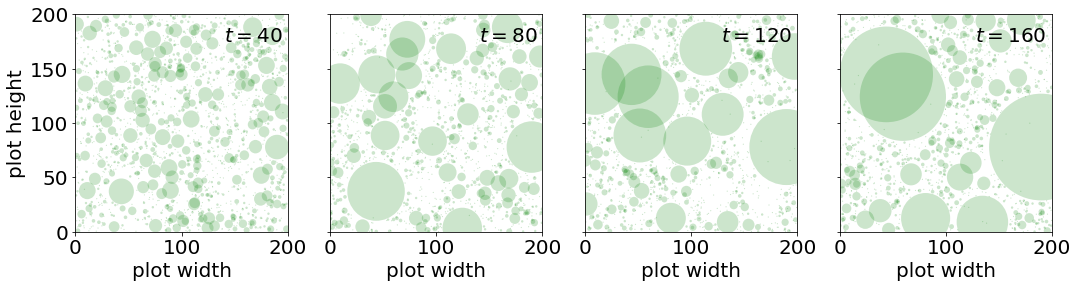

In [396]:
fig, ax = plt.subplots(figsize=(17.5,4), ncols=4)
for i, (k, t) in enumerate(trees.items()):
    forest.plot(all_trees=t, ax=ax[i])
    ax[i].text(195, 175, r'$t=%d$'%k, ha='right')
    if i>0: ax[i].set(yticklabels=[])
    else: ax[i].set(ylabel='plot height')
    ax[i].set(xlabel='plot width')

In [397]:
fig.savefig(f'{imgdr}/oscillation_plots.pdf', bbox_inches='tight')

Text(0.14, 0.395, 'B')

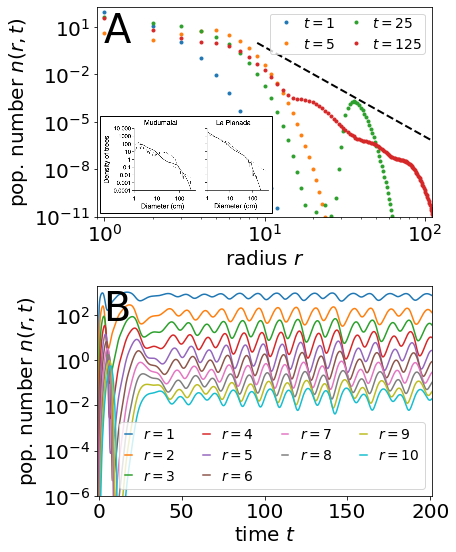

In [518]:
fig, ax = plt.subplots(figsize=(6,9), nrows=2,
                       gridspec_kw={'hspace':.33})

tplot = [1, 5, 25, 125]
y = pd.read_csv('../mathematica/nk_oscillations.csv')
for i, t in enumerate(tplot):
    ax[0].plot(y.columns, y.iloc[i], '.')
x = array([9, 200])
y = x**(-6+1/3)
y *= 1 / y[0]
ax[0].loglog(x, y, 'k--', lw=2)

ax[0].set(xscale='log', yscale='log',
       xlabel=r'radius $r$', ylabel=r'pop. number $n(r,t)$')
ax[0].set(xlim=(.9, 100/.9), ylim=(1e-11, 2e2))
ax[0].legend([r'$t=%d$'%i for i in tplot],
             fontsize='x-small',
             ncol=2,
             handletextpad=.2,
             borderpad=.2,
             columnspacing=.5,
             loc=1)

forestex = imread('../writing/20200723_dynamics_draft/wave_example.png')
imagebox = OffsetImage(forestex, zoom=.11)
ab = AnnotationBbox(imagebox, (3.25, 2e-8), pad=.1)
ax[0].add_artist(ab)

y = pd.read_csv('../mathematica/curves.csv')
x = array(y.columns.values).astype(float)
for i in range(10):
    ax[1].semilogy(x, y.iloc[i], '-')
ax[1].set(ylim=(1e-6, 2e3), xlim=(-1,201),
          xlabel=r'time $t$', ylabel=r'pop. number $n(r,t)$')
ax[1].legend([r'$r=%d$'%r for r in range(1,11)],
             fontsize='x-small', handlelength=.5, ncol=4)

fig.text(.14, .825, 'A', fontsize='40')
fig.text(.14, .395, 'B', fontsize='40')

In [519]:
fig.savefig(f'{imgdr}/pop_waves.pdf', bbox_inches='tight', dpi=200)

In [520]:
load_pickle('cache/automaton_oscillation_example.p')

['nk', 't', 'rk', 'forest', 'r0', 'g0', 'Abar', 'cg', 'sampleSize']

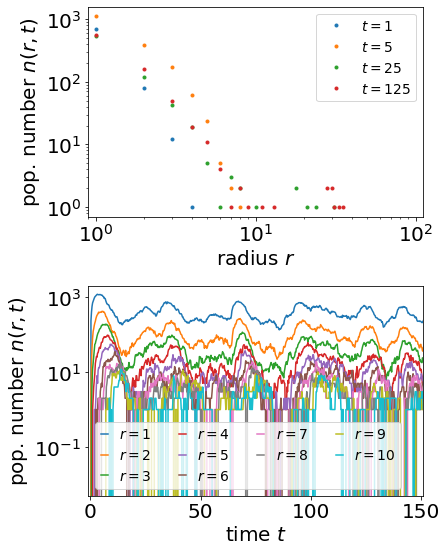

In [522]:
# average across forests
# thisnk = concatenate([i[:,:,None] for i in nk], axis=2).mean(2)
thisnk = nk[1]

fig, ax = plt.subplots(figsize=(6,9), nrows=2,
                       gridspec_kw={'hspace':.33})

for thist in [1, 5, 25, 125]:
    i = argmin((thist-t[0])**2)
    ax[0].loglog(forest.rRange, thisnk[i], '.')
ax[0].set(xlabel=r'radius $r$', ylabel=r'pop. number $n(r,t)$',
          xlim=(.9,100/.9))
ax[0].legend([r'$t=1$', r'$t=5$', r'$t=25$', r'$t=125$'], fontsize='x-small')
    
for i in range(10):
    ax[1].plot(t[0], thisnk[:,i])
    
ax[1].set(xlabel=r'time $t$', ylabel=r'pop. number $n(r,t)$',
          yscale='log', ylim=(1e-2/2, 2e3), xlim=(-1,151))
ax[1].legend([r'$r=%d$'%r for r in range(1,11)],
             fontsize='x-small', handlelength=.5, ncol=4)

In [523]:
fig.savefig(f'{imgdr}/2d_pop_waves.pdf', bbox_inches='tight')

In [491]:
load_pickle('plotting/spatial_correlation.p')

['p', 'r']

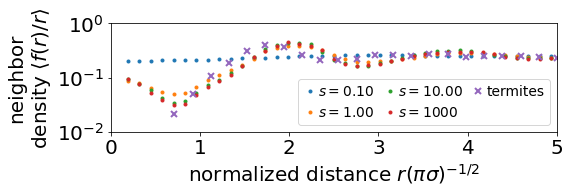

In [492]:
fig, ax = plt.subplots(figsize=(8,2))

for p_ in list(p.values())[::3]:
    # spatial autocorrelation function
    ax.semilogy(r, p_/r, '.')
    
namp, namr = data.namibia_corr_fcn()
drRatio = (namr[1]-namr[0]) / (r[1]-r[0])
ax.plot(namr, namp/namr / drRatio, 'x', mew=2)
    
ax.set(xlim=(0,5), yscale='log',
       xlabel=r"normalized distance $r(\pi\sigma)^{-1/2}$", ylabel='neighbor\n'+r"density $\langle f(r)/r\rangle$")
ax.set(ylim=(1e-2,1), yticks=[1e-2,.1,1])
ax.legend([r'$s=%1.2f$'%i for i in areaDeathRateRange[::3]][:-1]+[r'$s=1000$']+['termites'],
          ncol=3, fontsize='x-small', columnspacing=.6, handletextpad=.09, handlelength=1)

In [493]:
fig.savefig(f'{imgdr}/spatial_corr.pdf', bbox_inches='tight')

In [270]:
df = pd.read_csv('../data/Tarnita/termite_mound_location_field_data/Namib_G1.txt',
                 sep='\t',
                 header=None)
termitexy = df.values

In [ ]:
load_pickle('cache/packing_example.p')

allxy = xy
xy = vstack(allxy[areaDeathRateRange[-1]][0])

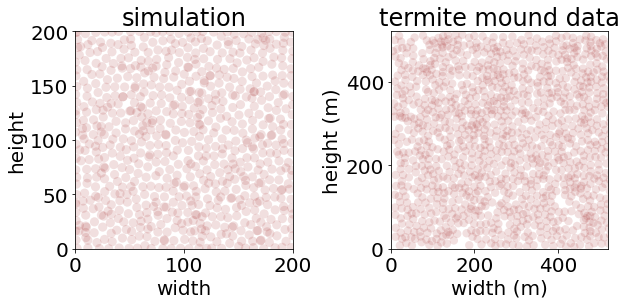

In [295]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(121, aspect='equal'), fig.add_subplot(122, aspect='equal')

data.plot(xy, [4.2]*len(xy), 200, ax=ax[0])
data.plot(termitexy, [10]*len(termitexy), 520, ax=ax[1])

ax[0].set(title='simulation', xlabel='width', ylabel='height')
ax[1].set(title='termite mound data', xlabel='width (m)', ylabel='height (m)')

fig.subplots_adjust(wspace=.3)

In [296]:
fig.savefig(f'{imgdr}/termite_mounds.pdf', bbox_inches='tight')

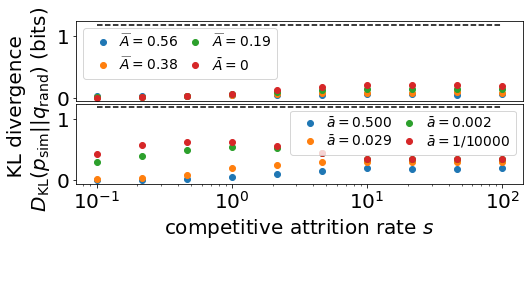

In [494]:
fig, ax = plt.subplots(figsize=(8,3), nrows=2, sharey=True,
                       gridspec_kw={'hspace':0.03})

load_pickle('plotting/dkl_Abar_range.p')
for kl_ in kl[1:]:
    ax[0].semilogx(areaDeathRateRange, kl_, 'o')
    
load_pickle('plotting/dkl_cg_range.p')
for kl_ in kl:
    ax[1].semilogx(areaDeathRateRange, kl_, 'o')

ax[0].hlines(1.19, areaDeathRateRange.min(), areaDeathRateRange.max(),
             linestyles='--')
ax[1].hlines(1.19, areaDeathRateRange.min(), areaDeathRateRange.max(),
             linestyles='--')

ax[1].set(xlabel=r'competitive attrition rate $s$',
          ylabel='            KL divergence\n'r'           $D_{\rm KL}(p_{\rm sim}||q_{\rm rand})$ (bits)')
# ax[0].xaxis.set_tick_params(length=0)
ax[0].set(xticks=[])
ax[0].xaxis.set_ticks_position('none')
ax[1].set(ylim=ax[0].get_ylim())
ax[0].legend([r'$\widebar A=%1.2f$'%a for a in AbarRange[1:-1]]+[r'$\bar{A}=0$'],
             fontsize='x-small', handletextpad=.2, ncol=2, loc=2, columnspacing=.2)
ax[1].legend([r'$\bar{a}=%1.3f$'%a for a in cgRange[:-1]]+[r'$\bar{a}=1/10000$'],
             fontsize='x-small', handletextpad=.2, ncol=2, loc=1, columnspacing=.2, labelspacing=.2)

In [495]:
fig.savefig(f'{imgdr}/dkl.pdf', bbox_inches='tight')

[[<matplotlib.axis.YTick at 0x7f235e7aaac0>,

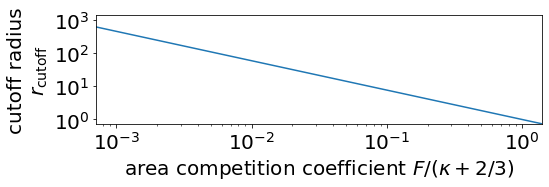

In [572]:
fig, ax = plt.subplots(figsize=(8,2))

coeff = logspace(-4,1.1,10)
# coeff = linspace(1e-3,1,1000)
delta = 1.8 - 4/3

ax.loglog(coeff, coeff**(-1/(delta+2/3)), '-')

ax.set(xlabel=r'area competition coefficient $F/(\kappa+2/3)$',
       ylabel='cutoff radius\n'r'$r_{\rm cutoff}$',
       xlim=(0.000707945784384138, 1.4125375446227544),
       ylim=(0.7373047958716826, 1e3/0.7373047958716826))
ax.set(yticks=[1,10,100,1000])

In [573]:
fig.savefig(f'{imgdr}/cutoff_scaling.pdf', bbox_inches='tight')

In [567]:
def forest_plot(plotNo, ax):
    df = pd.read_csv('../data/uas/southeast_alaska/Data/Data.csv')

    ix = df['Plot ']==plotNo  # select a patch
    x, y = df['Xcoord.m'].loc[ix], df['Ycoord.m'].loc[ix]
    r = df['DBH.cm'].loc[ix] / 100 * 5

    # there are some weird outliers that must something wrong
    badix = (x<0) | (x>100)
    x = x[~badix]
    y = y[~badix]
    r = r[~badix]

    # create patches for plotting
    p = []
    for x_, y_, r_ in zip(x, y, r):
        p.append(Circle((x_,y_), r_))
        
    patches = PatchCollection(p, alpha=.3)
    
    ax.plot(x, y, 'k.', ms=2)
    ax.add_collection(patches)

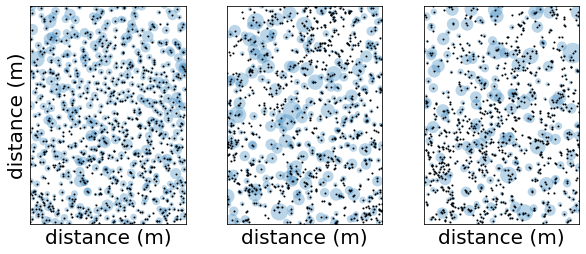

In [570]:
fig, ax = plt.subplots(figsize=(10,4), ncols=3, sharex=True, sharey=True)
ax = ax.ravel()

forest_plot(32, ax[0])
forest_plot(76, ax[1])
forest_plot(130, ax[2])

ax[-1].set(xlim=(0,100), ylim=(0,140))
ax[0].set(ylabel='distance (m)')
for a in ax:
    a.set_aspect('equal')
    a.set(xlabel='distance (m)', xticks=[], yticks=[])

In [571]:
fig.savefig(f'{imgdr}/alaskan_forest.pdf', bbox_inches='tight')

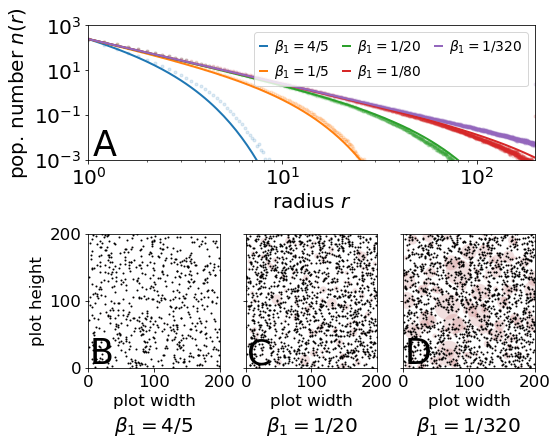

In [602]:
# is the disagreement from the fact that the "core" of the tree is less likely to have competitors
# such that you actually don't compete with all of you're area?
load_pickle('cache/biomass_scaling_w_compet_nu=2.5.p.bak')

for k in nk.keys():
    nk[k] = np.concatenate([i[-1000:,:,None] for i in nk[k]], axis=2).mean(2)

kappa = (1.8 - 4/3) * (nu-1)
f = forest.coeffs['sharing fraction']
rhobar = forest.coeffs['resource efficiency']
cr = forest.coeffs['root']**2 * np.pi

lastn = 1000

gs = GridSpec(2, 3, hspace=.55)
fig = plt.figure(figsize=(8,6.3))
ax = fig.add_subplot(gs[0,:])

h = []
for i, (rk_, nk_) in enumerate(zip(rk.values(), nk.values())):
    h.append(ax.plot(rk_[0], nk_[-lastn:].mean(0), '.', zorder=0, alpha=.14))
    
    beta1 = basalRange[i]
    vareps = forest.coeffs['resource efficiency']
    assert nu>2
    xi0 = (nu-2)**(1/(2-nu))

    B = (beta1 * xi0 / vareps / rhobar / cr / (1-f))**(nu-1) / (nu-1)
    s = forest.coeffs['area competition']
    dx = rk_[0][1] - rk_[0][0]
    n0 = g0 / (Abar + cg/dx + A * r0**kappa)
    
    y = (n0 * (rk_[0]/r0)**(-1/3 - Abar/cg) *
         np.exp(-B * s / cg / (kappa+2/3) * (rk_[0]**(kappa+2/3) - r0**(kappa+2/3))))
    h.append(ax.loglog(rk_[0], y, '-', lw=2, c=f'C{i}', zorder=1)[0])
    
ax.text(1.05, 1.5e-3, 'A', fontsize=35)
ax.set(xlabel=r'radius $r$',
       ylabel=r'pop. number $n(r)$',
       ylim=(1e-3, 1e3),
       xlim=(1,199))
ax.legend(h[1::2],
          [r'$\beta_1=4/5$', r'$\beta_1=1/5$', r'$\beta_1=1/20$', r'$\beta_1=1/80$', r'$\beta_1=1/320$'],
          fontsize='x-small',
          handlelength=.5, ncol=3, loc=1, columnspacing=1, handletextpad=.5)



load_pickle('plotting/biomass_scaling_w_compet_nu=2.5.p')

ax = [fig.add_subplot(gs[1,i]) for i in range(3)]
forest[basalRange[0]].plot(ax=ax[0],
                           show_canopy=False,
                           show_center=True)
ax[0].text(2, 6, 'B', fontsize=35)
[el.set_fontsize('small') for el in ax[0].yaxis.get_ticklabels()]
[el.set_fontsize('small') for el in ax[0].xaxis.get_ticklabels()]
ax[0].set_title(r'$\beta_1=4/5$', y=-.52, fontsize=20)
ax[0].set_xlabel('plot width', fontsize='small')
ax[0].set_ylabel('plot height', fontsize='small')
    
forest[basalRange[2]].plot(ax=ax[1],
                           show_canopy=False,
                           show_center=True,
                           plot_kw={'yticklabels':[]})
ax[1].text(2, 6, 'C', fontsize=35)
[el.set_fontsize('small') for el in ax[1].xaxis.get_ticklabels()]
ax[1].set_title(r'$\beta_1=1/20$', y=-.52, fontsize=20)
ax[1].set_xlabel('plot width', fontsize='small')

forest[basalRange[4]].plot(ax=ax[2],
                           show_canopy=False,
                           show_center=True,
                           plot_kw={'yticklabels':[]})
ax[2].text(2, 6, 'D', fontsize=35)
[el.set_fontsize('small') for el in ax[2].xaxis.get_ticklabels()]
ax[2].set_title(r'$\beta_1=1/320$', y=-.52, fontsize=20)
ax[2].set_xlabel('plot width', fontsize='small')

fig.savefig(f'{imgdr}/competition_example.pdf', bbox_inches='tight')

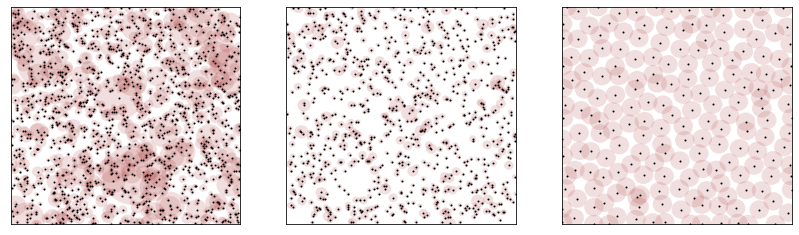

In [27]:
fig, ax = plt.subplots(figsize=(14,4), ncols=3, sharex=True, sharey=True)
ax = ax[::-1]

load_pickle('cache/spacing_with_Abar_no_growth.p')
allxy = xy
xy = vstack(allxy[AbarRange[-1]][areaDeathRateRange[-1]][0])
data.plot(xy, [8.5]*len(xy), 200, ax=ax[0], show_center=True,
          plot_kw={'xticks':[],'yticks':[]});

load_pickle('plotting/biomass_scaling_w_compet_nu=2.0.p')
forest[basalRange[0]].plot(ax=ax[1],
                           show_canopy=False,
                           show_center=True,
                           plot_kw={'xticks':[], 'yticks':[]})

forest[basalRange[2]].plot(ax=ax[2],
                           show_canopy=False,
                           show_center=True,
                           plot_kw={'xticks':[], 'yticks':[]})

fig.subplots_adjust(wspace=.2)

In [28]:
fig.savefig(f'{imgdr}/spacing_examples.pdf', bbox_inches='tight')

### Puerto Rico rainfall

In [255]:
load_pickle('plotting/pr_rainfall.p')

abovedt = np.concatenate(list(abovedt.values()))
belowdt = np.concatenate(list(belowdt.values()))

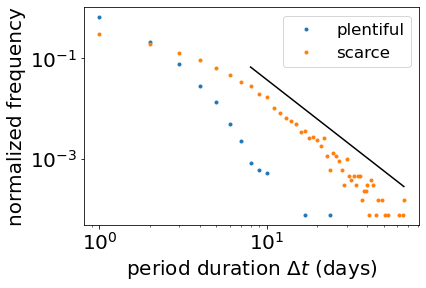

In [263]:
fig, ax = plt.subplots()

na = bincount(abovedt)[1:]
xa = arange(1, na.size+1)

nb = bincount(belowdt)[1:]
xb = arange(1, nb.size+1)
    
na = na / na.sum()
nb = nb / nb.sum()

ax.loglog(xa, na, '.', c='C0')
ax.loglog(xb, nb, '.', c='C1')

# power law
x = array([8, xb[-1]])
ax.loglog(x, 15 * x**-2.6, 'k-')

ax.set(xlabel=r'period duration $\Delta t$ (days)', ylabel='normalized frequency')
ax.legend(('plentiful', 'scarce'), fontsize='small')

fig.savefig(f'{imgdr}/pr_rainfall.pdf', bbox_inches='tight')

#### Automaton solution to WEB model

<ipython-input-37-4431144a3497>:43: RuntimeWarning: invalid value encountered in double_scalars
  lognk[k] = np.array([nk_[ix==i].sum() / (ix==i).sum() for i in range(ix.max()+1)])


[None, None, None, None, None, None, None]

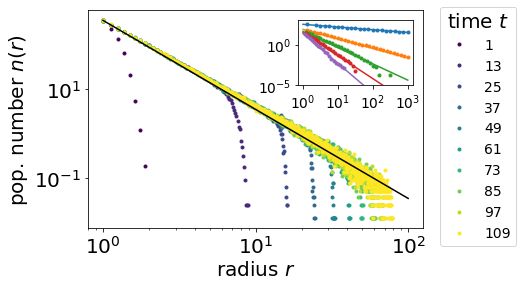

In [37]:
load_pickle('cache/linear_model_exponent_transience.p')

rk = rk[0]
nk = np.concatenate([i[:,:,None] for i in nk], axis=2)
nk = nk.mean(2)
tRange = range(1, 112, 12)

fig, ax = plt.subplots()

h = []
cmap = colorcycle(10)
for i in tRange:
    h.append(ax.loglog(rk, nk[i], '.', c=next(cmap))[0])

dx = (rk[1]-rk[0])
y = rk**(-1/3 -cm/cg)
y *= g0 / (cg / dx * rk[0]**(2/3) + cm * rk[0]**(-2/3)) / y[0]
ix = rk<100
h.append(ax.loglog(rk[ix], y[ix], 'k-')[0])

ax.set(xlabel=r'radius $r$', ylabel=r'pop. number $n(r)$',
       xlim=(.8, 100/.8))
leg = ax.legend(h, tRange, title=r'time $t$',
                bbox_to_anchor=(1.3,1.05),
                loc=1,
                fontsize='x-small')



load_pickle('cache/linear_model_exponent.p')

# create log bins
nbins = arange(5) * 6 + 25
lognk, logrk, dx = {}, {}, {}

counter = 0
for (k, nk_), rk_ in zip(nk.items(), rk.values()):
    nk_ = nk_[-200:].mean(0)
    
    ix = np.digitize(rk_, np.logspace(0, np.log10(rk_[-1]), nbins[counter]))
    
    logrk[k] = np.logspace(0, np.log10(rk_[-1]), nbins[counter])
    lognk[k] = np.array([nk_[ix==i].sum() / (ix==i).sum() for i in range(ix.max()+1)])
    dx[k] = rk_[1] - rk_[0]
    
    counter += 1

axins = inset_axes(ax, width=1.6, height=.9)
h = []

for i, (cm, rk_, nk_, dx_) in enumerate(zip(cmRange, logrk.values(), lognk.values(), dx.values())):
    h.append(axins.loglog(rk_, nk_[:-1], '.')[0])
    
    # match up slope prediction to last point
    exponent = 1/3 + cm / cg
    y = rk_**(-exponent)
    y *= g0 / (cg / dx_ + cm) / y[0]
    h.append(axins.loglog(rk_, y, '-', c=f'C{i}')[0])

axins.set(ylim=(1e-5, 1e3), xticks=(1,10,100,1e3))
[el.set_fontsize('x-small') for el in axins.xaxis.get_ticklabels()]
[el.set_fontsize('x-small') for el in axins.yaxis.get_ticklabels()]

In [39]:
fig.savefig(f'{imgdr}/indpt_model.pdf', bbox_inches='tight')

### Automaton solution to growth and death (only) model

In [63]:
load_pickle('cache/linear_model_exponent.p')

['g0', 'L', 'nSample', 'cmRange', 'cg', 'dt', 't', 'nk', 'rk']

In [74]:
# create log bins
nbins = arange(5) * 6 + 25
lognk, logrk, dx = {}, {}, {}

counter = 0
for (k, nk_), rk_ in zip(nk.items(), rk.values()):
    nk_ = nk_[-200:].mean(0)
    
    ix = np.digitize(rk_, np.logspace(0, np.log10(rk_[-1]), nbins[counter]))
    
    logrk[k] = np.logspace(0, np.log10(rk_[-1]), nbins[counter])
    lognk[k] = np.array([nk_[ix==i].sum() / (ix==i).sum() for i in range(ix.max()+1)])
    dx[k] = rk_[1] - rk_[0]
    
    counter += 1

<ipython-input-74-58c91f54d1bb>:12: RuntimeWarning: invalid value encountered in double_scalars
  lognk[k] = np.array([nk_[ix==i].sum() / (ix==i).sum() for i in range(ix.max()+1)])


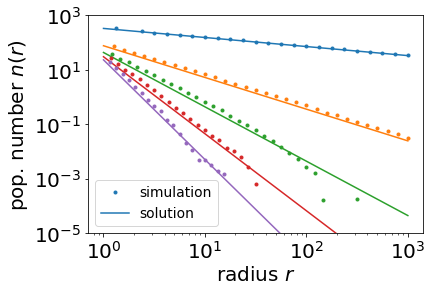

In [75]:
fig, ax = plt.subplots()
h = []

for i, (cm, rk_, nk_, dx_) in enumerate(zip(cmRange, logrk.values(), lognk.values(), dx.values())):
    h.append(ax.loglog(rk_, nk_[:-1], '.')[0])
    
    # match up slope prediction to last point
    exponent = 1/3 + cm / cg
    y = rk_**(-exponent)
    y *= g0 / (cg / dx_ + cm) / y[0]
    h.append(ax.loglog(rk_, y, '-', c=f'C{i}')[0])

ax.set(xlabel=r'radius $r$', ylabel=r'pop. number $n(r)$',
       ylim=(1e-5, 1e3))
ax.legend(('simulation', 'solution'), fontsize='x-small')

In [62]:
fig.savefig(f'{imgdr}/indpt_model.pdf', bbox_inches='tight')

### Non-power-law growth tail

In [32]:
r0 = 1
rmax = 10
a = 1
thalf = 5
lam = 1
mu0 = 1
kappa = 2

rdot = lambda r: rmax * a / 2 * cosh(arctanh(2 * r / rmax - 1))**-2
drdot = lambda r: -2 * a * (2*r / rmax - 1)
mu = lambda r: mu0 * r**(-2/3)

bsrange = np.logspace(-3, -1, 3)
rRange = np.linspace(r0, rmax-.05, 200)

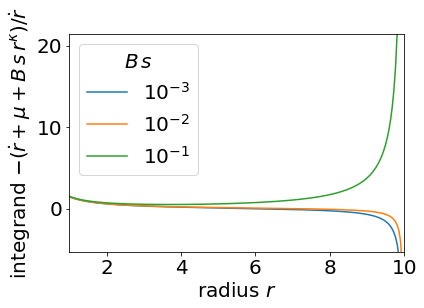

In [44]:
fig, ax = plt.subplots()

for bs in bsrange:
    ax.plot(rRange, (drdot(rRange) + mu(rRange) + bs * rRange**kappa)/rdot(rRange))
    
ax.set(xlabel=r'radius $r$', ylabel='integrand $-(\dot{r}+\mu+ B\,s\,r^\kappa)/\dot{r}$',
       xlim=(r0, rmax), ylim=(-5.308656142979472, 21.37184385702066))
ax.legend((r'$10^{-3}$',r'$10^{-2}$',r'$10^{-1}$'), title=r'$B\,s$')

fig.savefig(f'{imgdr}/pop_tail.pdf', bbox_inches='tight')